In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\ML\Heart Disease Prediction\heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().values.any()

False

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

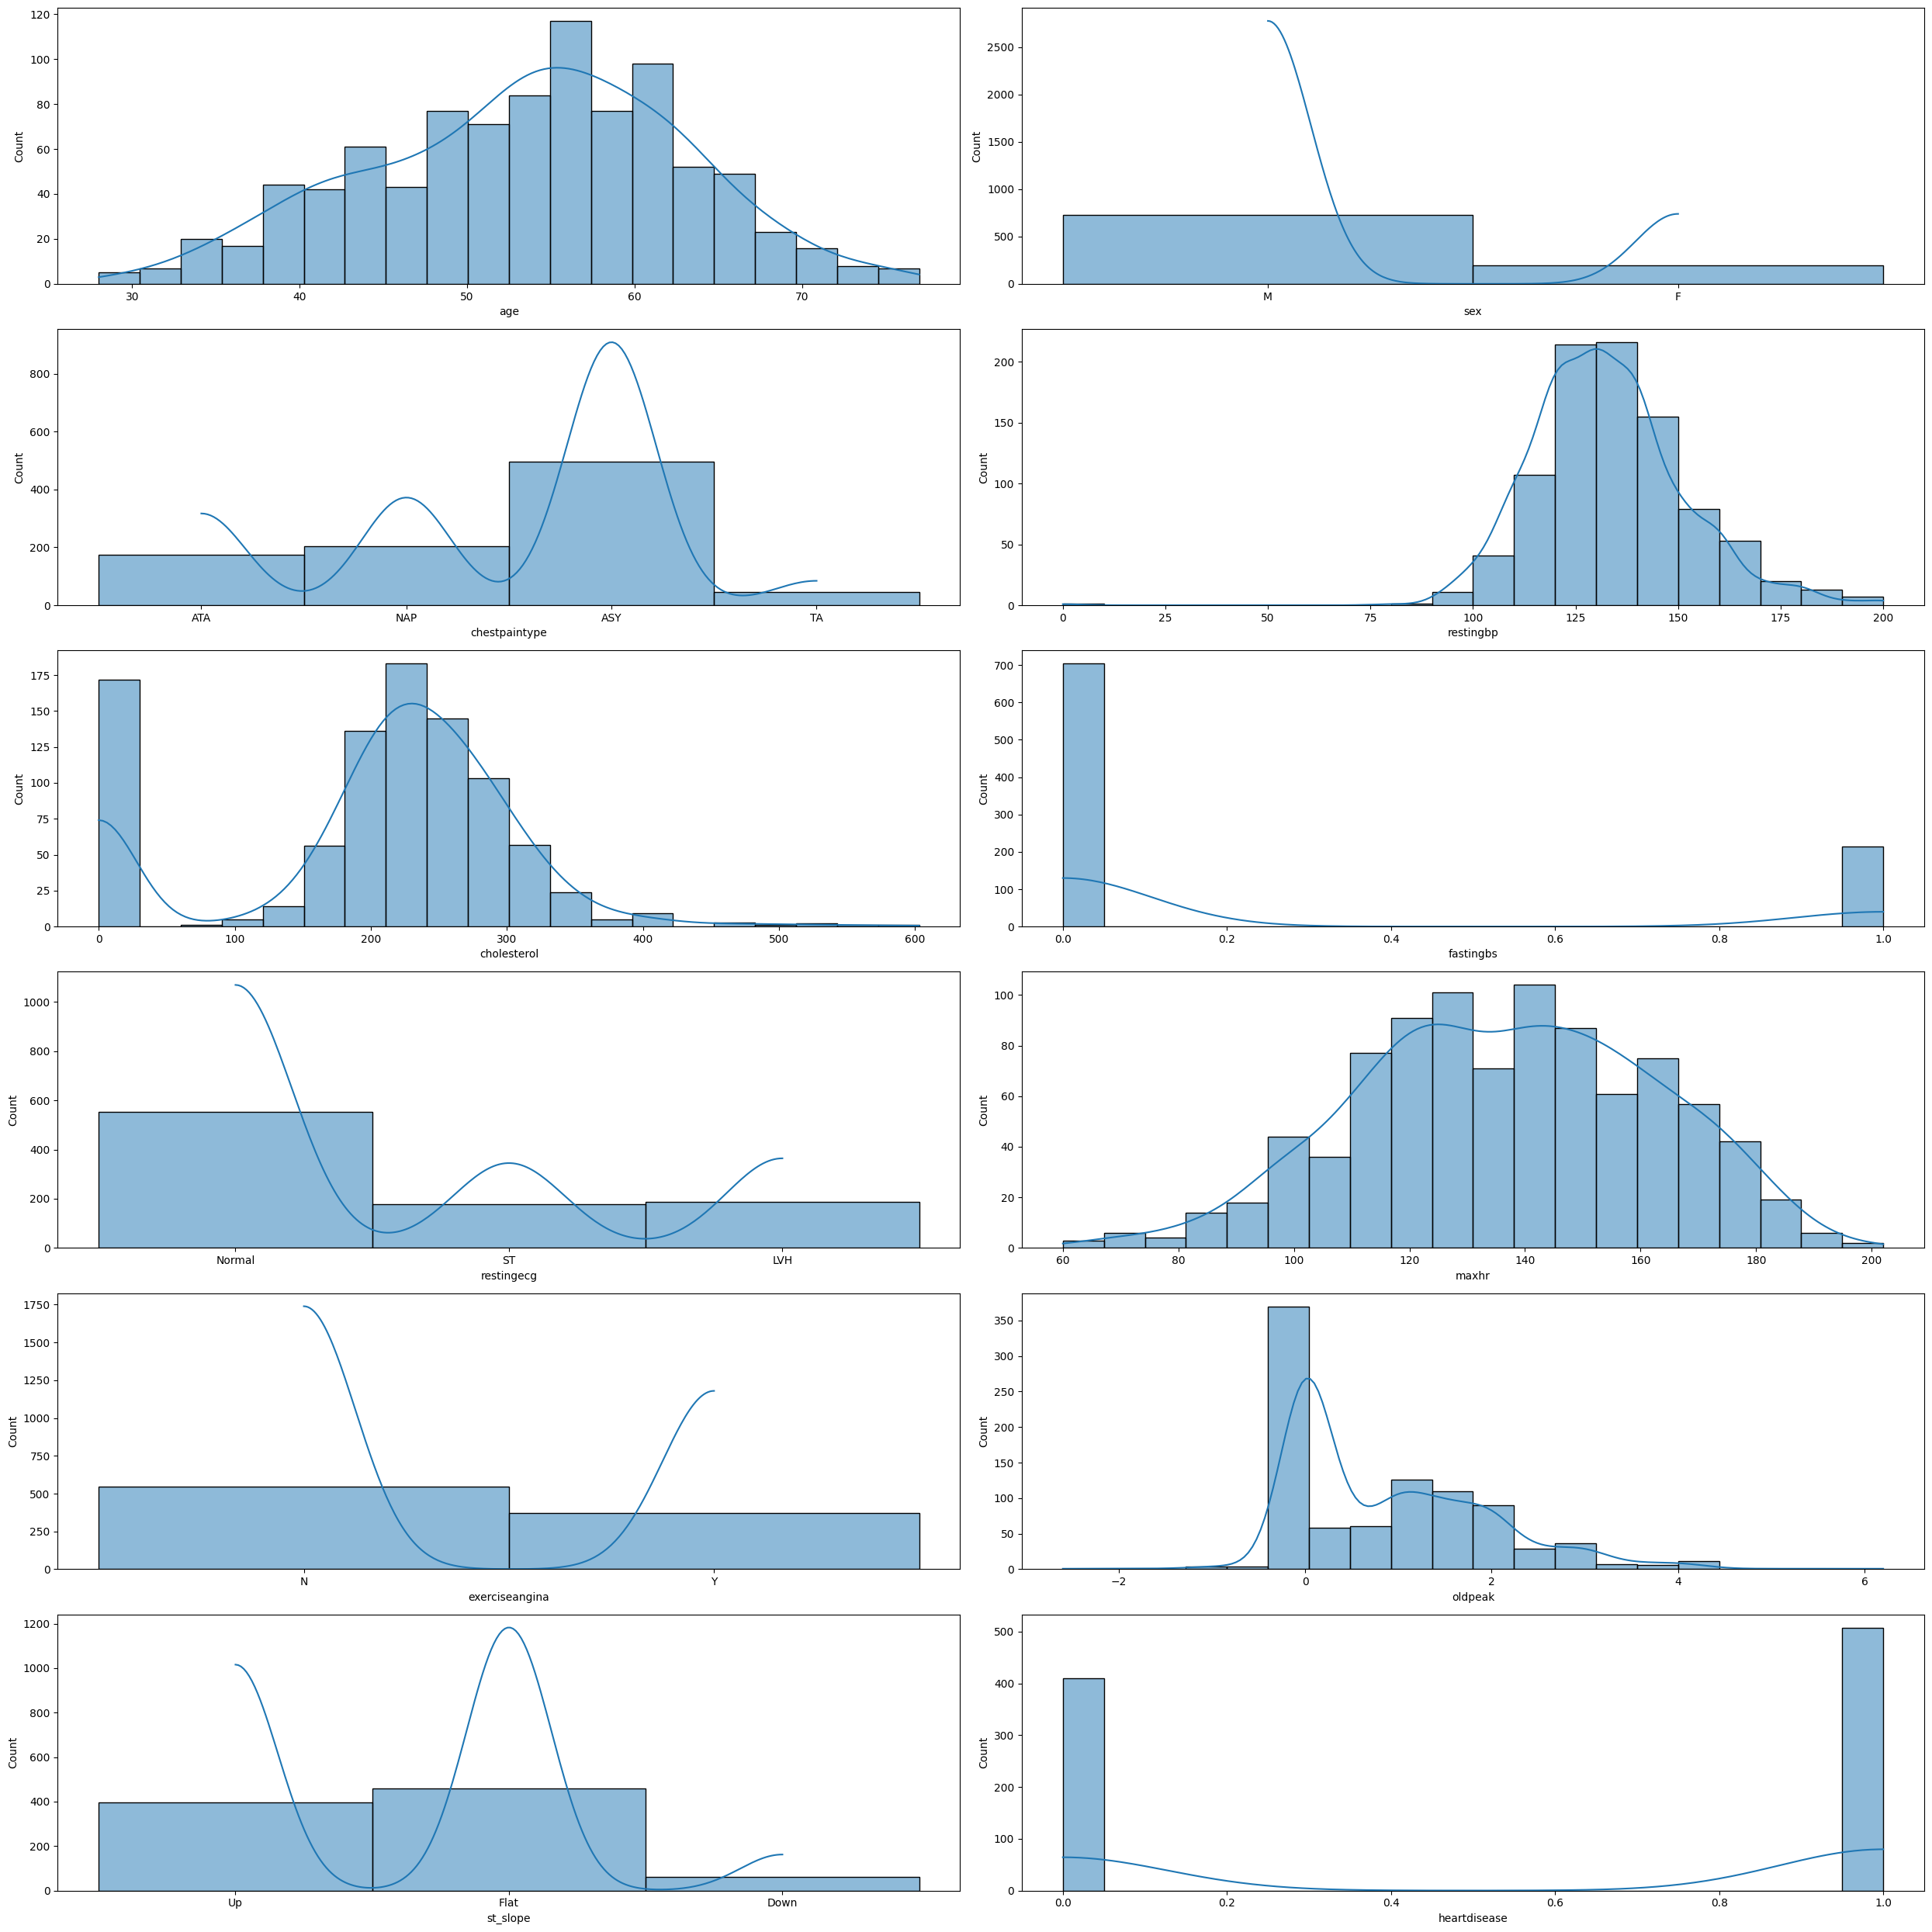

In [9]:
fig, ax = plt.subplots(6, 2, figsize=(25, 25))

sns.histplot(data.age, bins=20, kde=True, ax=ax[0, 0])
sns.histplot(data.sex, bins=20, kde=True, ax=ax[0, 1])
sns.histplot(data.chestpaintype, bins=20, kde=True, ax=ax[1, 0])
sns.histplot(data.restingbp, bins=20, kde=True, ax=ax[1, 1])
sns.histplot(data.cholesterol, bins=20, kde=True, ax=ax[2, 0])
sns.histplot(data.fastingbs, bins=20, kde=True, ax=ax[2, 1])
sns.histplot(data.restingecg, bins=20, kde=True, ax=ax[3, 0])
sns.histplot(data.maxhr, bins=20, kde=True, ax=ax[3, 1])
sns.histplot(data.exerciseangina, bins=20, kde=True, ax=ax[4, 0])
sns.histplot(data.oldpeak, bins=20, kde=True, ax=ax[4, 1])
sns.histplot(data.st_slope, bins=20, kde=True, ax=ax[5, 0])
sns.histplot(data.heartdisease, bins=20, kde=True, ax=ax[5, 1])

plt.tight_layout()
plt.show()

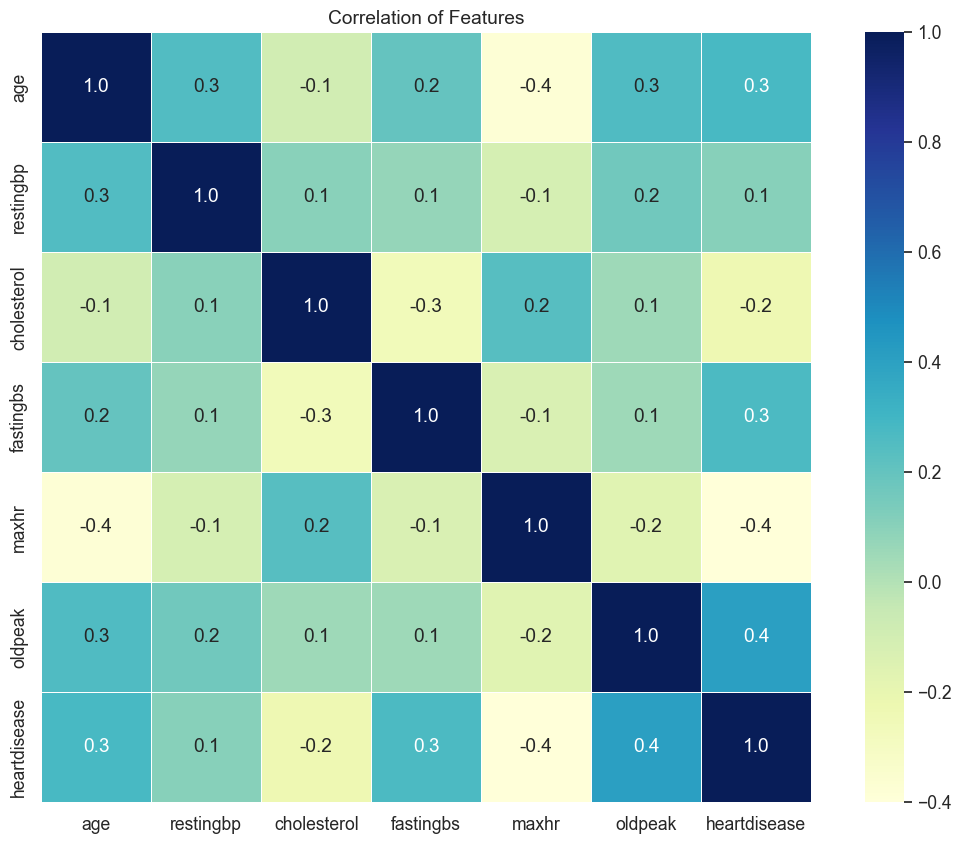

In [10]:
sns.set_theme(font_scale=1.15)
plt.figure(figsize=(14, 10))

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include='number')

# Generate the heatmap
sns.heatmap(numeric_data.corr(), vmax=1, linewidths=0.5, fmt='.1f',
            square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlation of Features')
plt.show()


In [13]:
x = data.drop(["heartdisease"], axis=1).select_dtypes(include=[np.number])

x = (x - x.min()) / (x.max() - x.min())

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

features = x_train.T
labels = y_train.T
test_features = x_test.T
test_labels = y_test.T

print("features: ", features.shape)
print("labels: ", labels.shape)
print("test_features: ", test_features.shape)
print("test_labels: ", test_labels.shape)

features:  (6, 734)
labels:  (734,)
test_features:  (6, 184)
test_labels:  (184,)


In [53]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1),0.01)
    b= 0.0
    return w,b

In [54]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
def foward_and_backward_propagation(w, b, x_train, y_train):
    #Forward Propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

In [56]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating (learning) parameters is number_of_iterations times
    for i in range(number_of_iterations):
        
        cost, gradients = foward_and_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        #Let's update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f" %(i, cost))
            
    # We update (learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.title("Cost-Iteration Relation")
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b) #decision boundary condition
    y_prediction = np.zeros((1, x_test.shape[1]))
    #
    #
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
            
    return y_prediction

Cost after iterations 0: 0.691442
Cost after iterations 10: 0.625080
Cost after iterations 20: 0.593753
Cost after iterations 30: 0.573833
Cost after iterations 40: 0.559517
Cost after iterations 50: 0.548549
Cost after iterations 60: 0.539828
Cost after iterations 70: 0.532717
Cost after iterations 80: 0.526809
Cost after iterations 90: 0.521822
Cost after iterations 100: 0.517558
Cost after iterations 110: 0.513868
Cost after iterations 120: 0.510643
Cost after iterations 130: 0.507798
Cost after iterations 140: 0.505268
Cost after iterations 150: 0.503004
Cost after iterations 160: 0.500963
Cost after iterations 170: 0.499114
Cost after iterations 180: 0.497431
Cost after iterations 190: 0.495893
Cost after iterations 200: 0.494481
Cost after iterations 210: 0.493181
Cost after iterations 220: 0.491980
Cost after iterations 230: 0.490868
Cost after iterations 240: 0.489837
Cost after iterations 250: 0.488877
Cost after iterations 260: 0.487983
Cost after iterations 270: 0.487149
Cos

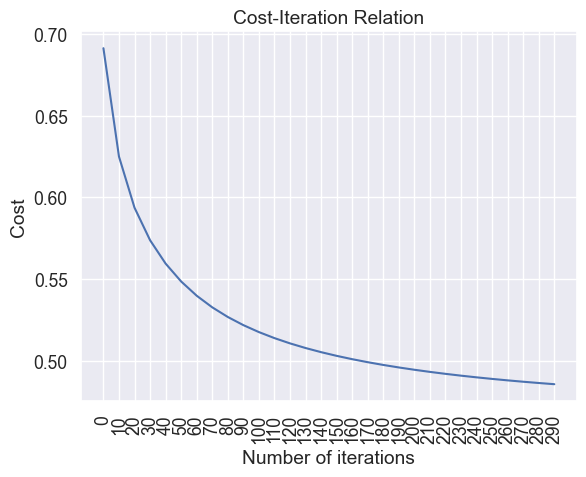

test accuracy: 72.82608695652175 %


In [58]:
def logistic_regression(features, labels, test_features, test_labels, learning_rate ,  num_iterations):
    # Initialize
    dimension =  features.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, features, labels, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],test_features)
    # Print test errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - test_labels)) * 100))
    
logistic_regression(features, labels, test_features, test_labels,learning_rate = 1.5, num_iterations = 300)   